In [53]:
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [54]:
X_train=np.load("datasets/X_train.npy",allow_pickle=True)
X_test=np.load("datasets/X_test.npy",allow_pickle=True)
y_train=np.load("datasets/y_train.npy",allow_pickle=True)
y_test=np.load("datasets/y_test.npy",allow_pickle=True)

# 2. 이진 분류기 훈련

In [55]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
#np.save("datasets/y_train_5",y_train_5)
#np.save("datasets/y_test_5",y_test_5)

In [56]:
some_digit=X_train[35] # r트레이닝 데이터셋에서 라벨이 True인 경우의 인덱스
# y_train_5[some_digit]

In [57]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(max_iter=5,random_state=43)
sgd_clf.fit(X_train,y_train_5)

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=43, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# 3. 성능 측정

### 3.3.1 교차 검증을 활용한 정확도 측정

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.96635, 0.96295, 0.96715])

하지만 데이터셋이 불규칙해서 5가 아닐 확률이 90프로이므로 정확도를 성능의 지표로 쓸 수 없다

### 3.3.2 오차 행렬

- 행은 실제 클래스를, 열은 예측한 클래스를 나타낸다

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # score가 아닌 예측 값 반환 (True/False)
confusion_matrix(y_train_5, y_train_pred ) # 오차 행렬, 행방향은 실제 클래스, 열방향은 예측값

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[53705,   874],
       [ 1197,  4224]], dtype=int64)

### 3.3.3 정밀도와 재현율

- 정밀도(precision) : 양성으로 예측된 것 중 실제 양성인 것의 비율
- 재현율(recall) : 실제 양성인 것 중 양성으로 예측된 것의 비율 (== 민감도(sensitivity), 진짜양성비율(true positive rate))

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("정밀도 :",precision_score(y_train_5,y_train_pred))
print("재현율 :",recall_score(y_train_5,y_train_pred))
print("f1 score :", f1_score(y_train_5,y_train_pred))

정밀도 : 0.8285602196939976
재현율 : 0.7791920309905921
f1 score : 0.8031181671261527


### 3.3.4 정밀도 재현율 트레이드오프
- 결정 함수(decision function) : SGD classifier에서 각 샘플의 점수를 계산하는 함수
- 결정 임계값(threshold) : 임계값 이상의 점수를 가진 샘플에 대하여 양성으로 분류한다. 임계값이 커지면 정밀도가 커지고 재현율이 줄어들며, 임계값이 작아지면 정밀도가 줄어들고 재현율이 커진다.
- 정밀도를 크게 하면 재현율이 작아지고, 재현율을 크게 하면 정밀도가 줄어든다

In [61]:
y_scores=sgd_clf.decision_function(X_train)
print(y_scores)

[-276451.18795575 -354318.39017237 -747783.28540457 ...  -97374.21427811
 -318262.15742742   27728.46048161]


In [64]:
y_train_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
print(y_train_scores) # 결정함수로 예측한 점수 반환

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[-376809.68258432 -611730.15482548 -991627.21898997 ... -341428.9883914
 -541719.83560954 -304125.86748035]


In [65]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

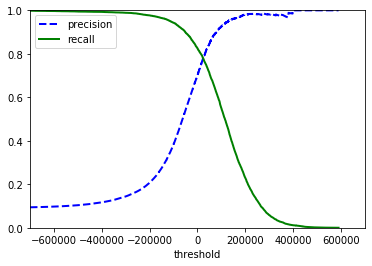

In [70]:
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)

plt.xlabel("threshold", fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.ylim([0, 1])
plt.xlim([-700000, 700000])

plt.show()

In [82]:
# 정밀도 90에서 재현율
y_train_prec_90=(y_scores>80000) # 정밀도 90을 달성하는 임계값은 약 80000
print(precision_score(y_train_5, y_train_prec_90))
print(recall_score(y_train_5, y_train_prec_90))

0.8997587778075583
0.6192584394023243


### 3.3.5 ROC 곡선
- 수신기 조작 특성 (receiver operating charictaristics, ROC)
- 거짓 양성 비율에대한 진짜 양성 비율의 곡선
- 거짓 양성 비율(FPR) : 실제로 음성인 데이터중 양성으로 예측된 데이터 비율
- 진짜 양성 비울(TPR) : 실제로 양성인 데이터 중 양성으로 예측된 것의 비율 (재현율, 민감도)
- 특이도(TNR) : 실제 음성 데이터 중 양성으로 잘못 예측된 비율
- 곡선 아래 면적(area under the curve, AUC) : 분류기의 성능을 측정하는 지표, 곡선이 대각선에서 멀어질수록 좋은 분류기이기 때문이다. 거짓양성 비율이 0일때 진짜 양성 비율이 1에 가까울수록 좋은 분류기이기 때문

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
auc = roc_auc_score(y_train_5,y_scores)

print(auc)

0.9647536054510514


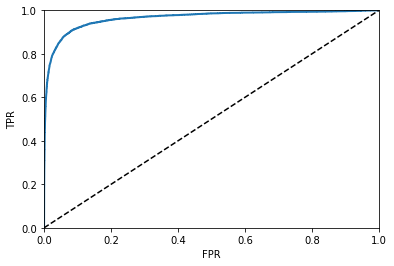

In [88]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # 중간 대각선 그림, 랜덤한 분류기의 ROC 곡선
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()